# Recurrent Neural Network

Implement a basic RNN network and an LSTM network with Keras\
Use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction 
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement Basic RNN network with Keras to predict time series##
### 1.1 Prepare the data

Prepare time series data for deep neural network training.

**Tasks:**
1. Load train and test data: "train.txt" and "test.txt".
2. Generate the **TRAIN** and **TEST** labels. 
2. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". 
3. Print out the **TEST** data and label.


Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [ ]:
### Import Libraries ###

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import numpy as np

### Set random seed to ensure deterministic results
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)
reset_random_seeds()

In [ ]:
### Prepare and Preprocess Data Here ###

from pandas import read_csv

### Design a Function to Prepare Observation Sequences and Corresponding Labels ###
def create_dataset(dataset, look_back=12): # look_back is used to specify input sequence length
     dataX, dataY = [], []
     for i in range(len(dataset)-look_back):
         dataX.append(dataset[i:i + look_back]) # make sure correct start and end elements
         dataY.append(dataset[i + look_back]) # make sure correct start and end elements; here, we have only one point ahead for prediction
     return np.array(dataX), np.array(dataY)

### Train and Test Data Loading with float32 type ####
dataframe_test = read_csv('test.txt')['Passengers']
dataset_test = dataframe_test.values
dataset_test = dataset_test.astype('float32')
test_data = dataset_test.reshape(len(dataset_test), 1)

dataframe_train = read_csv('train.txt')['Passengers']
dataset_train = dataframe_train.values
dataset_train = dataset_train.astype('float32')
train_data = dataset_train.reshape(len(dataset_train), 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### Scale Training and Test Data to [0, 1] ###
scaler = MinMaxScaler(feature_range=(0, 1)) # specify the scaler
train = scaler.fit_transform(train_data) # fit the scaler to the training data
test = scaler.fit_transform(test_data) # fit the scaler to the test data


In [ ]:
### Train and Test Data Split
trainX = np.expand_dims(train, axis=1)
testX = np.expand_dims(test, axis=1)

trainX, trainY = create_dataset(train, look_back=12) # historical window is 12; future window is 1.
testX, testY = create_dataset(test, look_back=12)

### Train and Test Data Reshape (to fit RNN input)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) 
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# print out the test data and label here
print(testX)
print(testY)

print("TrainX.shape = ", trainX.shape)
print("TrainY.shape = ", trainY.shape)

print("TestX.shape = ", testX.shape)
print("TestY.shape = ", testY.shape)

[[[0.5801282  0.625      0.30128205 0.15705132 0.         0.08653843
   0.16025639 0.1025641  0.3076923  0.27564108 0.3525641  0.5192307 ]]

 [[0.625      0.30128205 0.15705132 0.         0.08653843 0.16025639
   0.1025641  0.3076923  0.27564108 0.3525641  0.5192307  0.7628205 ]]

 [[0.30128205 0.15705132 0.         0.08653843 0.16025639 0.1025641
   0.3076923  0.27564108 0.3525641  0.5192307  0.7628205  0.798077  ]]

 [[0.15705132 0.         0.08653843 0.16025639 0.1025641  0.3076923
   0.27564108 0.3525641  0.5192307  0.7628205  0.798077   0.49038458]]

 [[0.         0.08653843 0.16025639 0.1025641  0.3076923  0.27564108
   0.3525641  0.5192307  0.7628205  0.798077   0.49038458 0.31089747]]

 [[0.08653843 0.16025639 0.1025641  0.3076923  0.27564108 0.3525641
   0.5192307  0.7628205  0.798077   0.49038458 0.31089747 0.16666663]]

 [[0.16025639 0.1025641  0.3076923  0.27564108 0.3525641  0.5192307
   0.7628205  0.798077   0.49038458 0.31089747 0.16666663 0.30448723]]

 [[0.1025641  0.3

### 1.2 - Build the RNN model ##


Build an RNN model with SimpleRNN cell. 

**Tasks:**
1. Build an RNN model with 1 RNN layer and 1 Dense layer.
2. Compile the model.
3. Train the model for 100 epochs with **batch_size = 10**. 

**tensorflow.keras.layers.SimpleRNN(unit_size=4)** to specify RNN cells.
Loss function = 'mean_squared_error' and select **Adam** optimizer with **learning_rate=0.01** and other default settings.
After first epoch, the train loss is changed to around **0.0656**. 


In [ ]:
### Build the RNN Model ###
import keras
from keras.models import Sequential

keras.backend.clear_session()

model = Sequential() # Declare Sequential class and assign it to variable "model"
model.add(tf.keras.layers.SimpleRNN(units=4)) # Add a simple RNN layer with unit_size=4 in the model 
model.add(keras.layers.Dense(units=1)) # Add a following Dense layer with units=1 in the model 


In [ ]:
### Compile the RNN model ###

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)# model compiled with mean_squared_error loss and adam optimizer

In [ ]:
### Train the RNN model and PRINT OUT MODEL STRUCTURE with model.summary() ###

model.fit(x=trainX, y=trainY, epochs=100, batch_size=10, verbose=2) # model fit with epoch=100, batch_size=10; verbose=2 is optional.
model.summary() # print out model structure with model.summary()


Epoch 1/100
11/11 - 0s - loss: 0.0656
Epoch 2/100
11/11 - 0s - loss: 0.0340
Epoch 3/100
11/11 - 0s - loss: 0.0215
Epoch 4/100
11/11 - 0s - loss: 0.0144
Epoch 5/100
11/11 - 0s - loss: 0.0125
Epoch 6/100
11/11 - 0s - loss: 0.0115
Epoch 7/100
11/11 - 0s - loss: 0.0092
Epoch 8/100
11/11 - 0s - loss: 0.0080
Epoch 9/100
11/11 - 0s - loss: 0.0068
Epoch 10/100
11/11 - 0s - loss: 0.0056
Epoch 11/100
11/11 - 0s - loss: 0.0047
Epoch 12/100
11/11 - 0s - loss: 0.0055
Epoch 13/100
11/11 - 0s - loss: 0.0035
Epoch 14/100
11/11 - 0s - loss: 0.0035
Epoch 15/100
11/11 - 0s - loss: 0.0034
Epoch 16/100
11/11 - 0s - loss: 0.0037
Epoch 17/100
11/11 - 0s - loss: 0.0028
Epoch 18/100
11/11 - 0s - loss: 0.0029
Epoch 19/100
11/11 - 0s - loss: 0.0029
Epoch 20/100
11/11 - 0s - loss: 0.0029
Epoch 21/100
11/11 - 0s - loss: 0.0022
Epoch 22/100
11/11 - 0s - loss: 0.0022
Epoch 23/100
11/11 - 0s - loss: 0.0020
Epoch 24/100
11/11 - 0s - loss: 0.0024
Epoch 25/100
11/11 - 0s - loss: 0.0027
Epoch 26/100
11/11 - 0s - loss: 0.

### 1.3 Evaluate Predictive Model Performance

Predict datapoints with the observed datapoints and trained model. 

**Tasks:**
1. Do direct prediction on train and test datapoints with the obtained model in section 1.2. 
2. Scale the prediction results back to original representation with the scaler. 
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**.
4. **Plot** the **TEST** label and prediction. 

 
Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
 
For validation: Train Score: **~13 RMSE** Test Score: **~19 RMSE**


In [ ]:
### Make Predictions ###

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
### Scale Back Predictions ###

trainPredict = scaler.inverse_transform(trainPredict) # scale train prediction back with scaler.inverse_transform()
trainY = scaler.inverse_transform(trainY)  # scale train labels back with scaler.inverse_transform()

testPredict = scaler.inverse_transform(testPredict) # scale test prediction back with scaler.inverse_transform()
testY = scaler.inverse_transform(testY) # scale test labels back with scaler.inverse_transform()


In [ ]:
### Calculate Root Mean Squared Error (RMSE) ###
import math
from sklearn.metrics import mean_squared_error # Import mean_squared_error from sklearn.metrics

trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0])) 
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 13.03 RMSE
Test Score: 19.02 RMSE


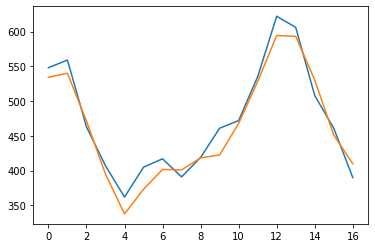

In [ ]:
### Plot Baseline and Predictions ###
import matplotlib.pyplot as plt

plt.plot(testY) 
plt.plot(testPredict)

## 2 - Build an LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data ###

Prepare IMDB data for reccurent neural network training.

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences.
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. 

 
  Load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features)  max_features is set to **1000**.
 
  Use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.

**Note:**\
We train the built LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
import random
import numpy as np


### Set random seed to ensure deterministic results
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

In [ ]:
# Prepare the data here

max_features = 1000 # Only consider the top 1k words
maxlen = 100 # Only consider the first 100 words of each movie review

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words = 1000) # load IMDB data with specified num_words = 1000; testing set is set to validation set.
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen = 100) # Pad IMDB training data with specified maxlen=100
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen = 100) # Pad IMDB validation data with specified maxlen=100



17465344/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


### 2.2 - Design and train LSTM model###

Build an LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Dense layer**. **Print out** model summary. The embedding vector is specified with the dimension of **8**.
2. Compile the LSTM model with **Adam** optimizer, **binary_crossentropy** loss function, and **accuracy** metrics.  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. 
4. **Print out** best validation accuracy.

 
For validation:\
**loss: ~0.5675 - accuracy: ~0.7072 - val_loss: ~0.4549 - val_accuracy: ~0.8020**


 https://keras.io/examples/nlp/bidirectional_lstm_imdb/

In [ ]:
### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(max_features, 8)(inputs) # Embed data in an 8-dimensional vector
x = layers.LSTM(8)(x) # Add 1st layer of LSTM with 8 hidden states (aka units)
outputs = layers.Dense(units=1, activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile("adam", "binary_crossentropy", metrics=["accuracy"])# Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))# Train the compiled model with model.fit()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 8)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 544       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,553
Trainable params: 8,553
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
782/782 [==============================] - 8s 10ms/step - loss: 0.5182 - accuracy: 0.7363 - val_loss: 0.4131 - val_accuracy: 0.8140
Epoch 2/2
782/782 [==============================] - 7s 10ms/step - loss: 0.3945 - accuracy: 0.8237 - val_lo

### 2.3 - LSTM hyperparameter tuning###

Boost the performance of obtained LSTM (aka vanilla model) by hyperparameter tuning.

**Tasks:**
- All modificiations are directly conducted based on the vanilla model.
- For each scenario, **report <span style="color:red"> BEST Validation Accuracy </span> and generate Training/Validation <span style="color:red"> Accuracy plots over epochs</span>**. Just paste the plot figures in the cells with **Markdown mode**. 
1.  Scenario 1:
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 16.
    - Modify the units of LSTM to 16.
2. Scenario 2:
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
3. Scenario 3:
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
    - Increase analysis length for review data to maxlen = 200


For validation:
- Scenario 1: **loss: ~0.4968 - accuracy: ~0.7450 - val_loss: ~0.4079 - val_accuracy: ~0.8198**
- Scenario 2: **loss: ~0.4764 - accuracy: ~0.7670 - val_loss: ~0.4133 - val_accuracy: ~0.8179**
- Scenario 3: **loss: ~0.4819 - accuracy: ~0.7644 - val_loss: ~0.4031 - val_accuracy: ~0.8105**


https://keras.io/examples/nlp/bidirectional_lstm_imdb/  

In [ ]:
########################### Scenario 1 ###########################
##################################################################

### Set random seed to ensure deterministic results ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

max_features = 1000  # Only consider the top 1k words
maxlen = 100 # Only consider the first 100 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(max_features, 16)(inputs) # Embed data in a 16-dimensional vector
x = layers.LSTM(16, return_sequences=True)(x) # Add 1st layer of LSTM with 16 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(16)(x) # Add 2nd layer of LSTM with 16 hidden states (aka units)
outputs = layers.Dense(1, activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile("adam", "binary_crossentropy", metrics=["accuracy"]) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 16)          16000     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 16)          2112      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 20,241
Trainable params: 20,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 7s 19ms/step - loss: 0.4968 - accuracy: 0.7450 - val_loss: 0.4

In [ ]:
########################### Scenario 2 ###########################
##################################################################

### Set random seed to ensure deterministic results ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

max_features = 1000 # Only consider the top 1k words
maxlen =  100 # Only consider the first 100 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(max_features, 128)(inputs) # Embed data in a 128-dimensional vector
x = layers.LSTM(128, return_sequences=True)(x) # Add 1st layer of LSTM with 128 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(128)(x) # Add 2nd layer of LSTM with 128 hidden states (aka units)
outputs = layers.Dense(1,activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile("adam", "binary_crossentropy", metrics=["accuracy"]) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         128000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 391,297
Trainable params: 391,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 9s 23ms/step - loss: 0.4764 - accuracy: 0.7670 - val_loss: 0

In [ ]:
########################### Scenario 3 ###########################
##################################################################

### Set random seed to ensure deterministic results ###
import os
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
def reset_random_seeds():
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

reset_random_seeds() # randomly set initial data

max_features = 1000 # Only consider the top 1k words
maxlen = 200 # Only consider the first 200 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(max_features, 128)(inputs) # Embed data in a 128-dimensional vector
x = layers.LSTM(128, return_sequences=True)(x) # Add 1st layer of LSTM with 128 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(128)(x) # Add 2nd layer of LSTM with 128 hidden states (aka units)
outputs = layers.Dense(1, activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model
model.summary() # Print out model summary

model.compile("adam", "binary_crossentropy", metrics=["accuracy"]) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         128000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 391,297
Trainable params: 391,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
391/391 [==============================] - 9s 22ms/step - loss: 0.4764 - accuracy: 0.7670 - val_loss: 0